## Analysis of variance (ANOVA)

ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means. 

### Assumptions of ANOVA

* 1) All populations involved follow a normal distribution
* 2) All populations have the same variance
* 3) The samples are randomly selected and independent of one another


## One-way ANOVA

### EXERCISE

Consider the monthly income of members from three different gyms - fitness centers given below:
* Gym 1 (n = 22): [60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73]
* Gym 2 (n = 18): [56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64]
* Gym 3 (n = 23): [67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45]  
Using ANOVA, test whether the mean monthly income is equal for each Gym.


### Step 1: State the null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

### Step 2: Decide the significance level

Here we select $\alpha$ = 0.05 

### Step 3: Identify the test statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate F, a test statistic

* scipy.stats.f.ppf gives the critical value at a given level of confidence with a pair of degrees of freedom.
* scipy.stats.f.cdf gives the cumulative distribution function for the given random variable - given the calculated F value at a given level of confidence with a pair of degrees of freedom. 

### Or formulate an ANOVA table using statsmodels

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In the formula. we know that 
* 1)  ~ separates the left hand side of the model from the right hand side
* 2) + adds new columns to the design matrix
* 3) :  adds a new column to the design matrix with the product of the other two columns
* 4) * also adds the individual columns multiplied together along with their product
* 5) C() operator denotes that the variable enclosed in C() will be treated explicitly as categorical variable.

### Step 5:  Decide to reject or accept null hypothesis

In [9]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [10]:
Gym_1 = np.array([60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73])
Gym_2 = np.array([56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64])
Gym_3 = np.array([67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45])
print('Count, Mean and standard deviation of mean monthly income of members from gym 1: %3d, %3.2f and %3.2f' % (len(Gym_1 ), Gym_1 .mean(),np.std(Gym_1 ,ddof =1)))
print('Count, Mean and standard deviation of mean monthly income of members from gym 2: %3d, %3.2f and %3.2f' % (len(Gym_2 ), Gym_2 .mean(),np.std(Gym_2 ,ddof =1)))
print('Count, Mean and standard deviation of mean monthly income of members from gym 3: %3d, %3.2f and %3.2f' % (len(Gym_3 ), Gym_3 .mean(),np.std(Gym_3 ,ddof =1)))

Count, Mean and standard deviation of mean monthly income of members from gym 1:  22, 62.55 and 8.67
Count, Mean and standard deviation of mean monthly income of members from gym 2:  18, 63.28 and 7.79
Count, Mean and standard deviation of mean monthly income of members from gym 3:  23, 60.83 and 8.00


In [12]:
monthlyincome_df = pd.DataFrame()

df1 = pd.DataFrame({'GYM': '1', 'Monthly_income':Gym_1})
df2 = pd.DataFrame({'GYM': '2', 'Monthly_income':Gym_2})
df3 = pd.DataFrame({'GYM': '3', 'Monthly_income':Gym_3})

monthlyincome_df = monthlyincome_df.append(df1) 
monthlyincome_df = monthlyincome_df.append(df2) 
monthlyincome_df = monthlyincome_df.append(df3) 

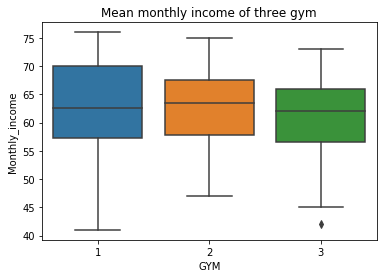

In [14]:
sns.boxplot(x = "GYM", y = "Monthly_income", data = monthlyincome_df)
plt.title('Mean monthly income of three gym')
plt.show()

In [13]:
# Null hypothesis : All mean are equal
# Alternate hypothesis : Atleast one differs.
# alpha = 0.05
# Anova test
# p_value calculate
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Monthly_income ~ GYM', data = monthlyincome_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

               sum_sq    df         F   PR(>F)
GYM         66.614123   2.0  0.497075  0.61079
Residual  4020.370004  60.0       NaN      NaN


In [21]:
# Decide to accept or reject hypothesis
print("The probability value is 0.61079 and is more than the 0.05, hence we accept the null hypothesis.")

The probability value is 0.61079 and is more than the 0.05, hence we accept the hypothesis.


---------------------

### EXERCISE

#### National Transportation Safety Board  (NTSB) examines the safety of compact cars, midsize cars and full-size cars. 

Using the fake data given below, test whether the mean pressure applied to the driver's head during a crash test is equal for each types of  car at 5% level of significance.

* mean_pressure_ compact_car    =  [643, 655,702]
* mean_pressure_ midsize_car    =  [469, 427, 525]
* mean_pressure_ fullsize_car   =  [484, 456, 402]

In [22]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [23]:
mean_pressure_compact_car    =  np.array([643, 655,702])
mean_pressure_midsize_car    =  np.array([469, 427, 525])
mean_pressure_fullsize_car   =  np.array([484, 456, 402])
print('Count, Mean and standard deviation of mean pressue exerted by compact car: %3d, %3.2f and %3.2f' % (len(mean_pressure_compact_car ), mean_pressure_compact_car .mean(),np.std(mean_pressure_compact_car ,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by midsize car: %3d, %3.2f and %3.2f' % (len(mean_pressure_midsize_car), mean_pressure_midsize_car.mean(),np.std(mean_pressure_midsize_car,ddof =1)))
print('Count, Mean and standard deviation of mean pressue exerted by full size car: %3d, %3.2f and %3.2f' % (len(mean_pressure_fullsize_car), mean_pressure_fullsize_car.mean(),np.std(mean_pressure_fullsize_car,ddof =1)))

Count, Mean and standard deviation of mean pressue exerted by compact car:   3, 666.67 and 31.18
Count, Mean and standard deviation of mean pressue exerted by midsize car:   3, 473.67 and 49.17
Count, Mean and standard deviation of mean pressue exerted by full size car:   3, 447.33 and 41.68


In [24]:
mean_pressure_df = pd.DataFrame()

df1            = pd.DataFrame({'Car_Type': 'C', 'Mean_Pressure':mean_pressure_compact_car})
df2            = pd.DataFrame({'Car_Type': 'M', 'Mean_Pressure':mean_pressure_midsize_car})
df3            = pd.DataFrame({'Car_Type': 'F', 'Mean_Pressure':mean_pressure_fullsize_car})

mean_pressure_df = mean_pressure_df.append(df1) 
mean_pressure_df = mean_pressure_df.append(df2) 
mean_pressure_df = mean_pressure_df.append(df3) 

### Let us explore the data graphically

### Step 1: State the null and alternative hypothesis:



### Step 2: Decide the significance level

### Step 3: Identify the test statistic

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [25]:
# Null hypothesis : All mean are equal
# Alternate hypothesis : Atleast one differs.
# alpha = 0.05
# Anova test
# p_value calculate
mod = ols('Mean_Pressure ~ Car_Type', data = mean_pressure_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq   df          F    PR(>F)
Car_Type  86049.555556  2.0  25.175411  0.001207
Residual  10254.000000  6.0        NaN       NaN


### Step 5:  Decide to reject or accept null hypothesis

In [ ]:
# Decide to accept or reject hypothesis
print("The probability value is 0.001207 and less than 0.05, hence we reject the null hypothesis.")

### Determine which mean(s) is / are different

* An ANOVA test will test that at least one mean is different. 
* You have rejected the null hypothesis but do not know which mean(s) is / are different.
We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(mean_pressure_df['Mean_Pressure'], mean_pressure_df['Car_Type']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
  C      F    -219.3333 -322.7791 -115.8876  True 
  C      M      -193.0  -296.4458  -89.5542  True 
  F      M     26.3333   -77.1124  129.7791 False 
--------------------------------------------------


#### Inference 



In [27]:
print("The mean pressure exerted by Compact cars is not equal to Full sized cars.")
print("The mean pressure exerted by Compact cars is not equal to Medium sized cars.")
print("The mean pressure exerted by Full sized cars is equal to Medium sized cars.")

The mean pressure exerted by Compact cars is not equal to Full sized cars.
The mean pressure exerted by Compact cars is not equal to Medium sized cars.
The mean pressure exerted by Full sized cars is equal to Medium sized cars.


### EXERCISE

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [0]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [28]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])

In [29]:
life_type_df = pd.DataFrame()

df1            = pd.DataFrame({'Type': 'A', 'Life_hours':life_type_A})
df2            = pd.DataFrame({'Type': 'B', 'Life_hours':life_type_B})
df3            = pd.DataFrame({'Type': 'C', 'Life_hours':life_type_C})

life_type_df = life_type_df.append(df1) 
life_type_df = life_type_df.append(df2) 
life_type_df = life_type_df.append(df3) 

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

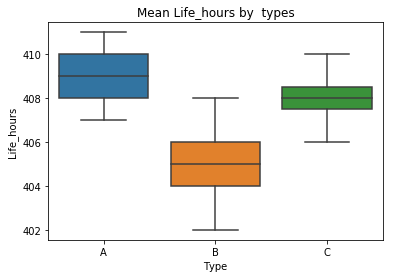

In [30]:
sns.boxplot(x = "Type", y = "Life_hours", data = life_type_df)
plt.title('Mean Life_hours by  types')
plt.show()

### a)  Write your inferene on the group means from the above boxplots.

In [37]:
print("The mean lifetime in hours for Company A is not equal to Company B.")
print("The mean lifetime in hours for Company B is not equal to Company C.")
print("The mean lifetime in hours for Company C is not equal to Company A.")

The mean lifetime in hours for Company A is not equal to Company B.
The mean lifetime in hours for Company B is not equal to Company C.
The mean lifetime in hours for Company C is not equal to Company A.


### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [33]:
mod = ols('Life_hours ~ Type', data = life_type_df).fit()
an_table = sm.stats.anova_lm(mod,typ = 2)
an_table

,sum_sq,df,F,PR(>F)
Type,36.0,2.0,4.5,0.044194
Residual,36.0,9.0,NaN,NaN


In [34]:
print("Yes, there is a difference in average lifetimes of the three types as p_value is less than 0.05.")

Yes, there is a difference in average lifetimes of the three types.


### c)  If  you were able to reject the null hypothesis, you can proceed with post-hoc analysis to determine which means are different 

In [36]:
print(pairwise_tukeyhsd(life_type_df['Life_hours'],life_type_df['Type']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  A      B      -4.0   -8.0746 0.0746 False 
  A      C      -1.0   -5.2613 3.2613 False 
  B      C      3.0    -0.7427 6.7427 False 
--------------------------------------------


## Two-way ANOVA

### EXERCISE

The following table shows the quantity of soaps at different discount at locations collected over 20 days.

In [38]:
table1  = [['Loc','Dis0','Dis10','Dis20'], [ 1, 20, 28, 32], [ 2, 20, 19, 20],
  [ 1, 16, 23, 29 ],[ 2, 21, 27, 31 ],[ 1, 24, 25, 28 ],[ 2, 23, 23, 35 ],
  [ 1, 20, 31, 27 ],[ 2, 19, 30, 25 ],[ 1, 19, 25, 30 ],[ 2, 25, 25, 31 ],
  [ 1, 10, 24, 26 ],[ 2, 22, 21, 31 ],[ 1, 24, 28, 37 ],[ 2, 25, 33, 31 ],
  [ 1, 16, 23, 33 ],[ 2, 21, 26, 23 ],[ 1, 25, 26, 27 ],[ 2, 26, 22, 22 ],
  [ 1, 16, 25, 31 ],[ 2, 22, 28, 32 ],[ 1, 18, 22, 37 ],[ 2, 25, 24, 22 ],
  [ 1, 20, 24, 28 ],[ 2, 23, 23, 29 ],[ 1, 17, 26, 25 ],[ 2, 23, 26, 25 ],
  [ 1, 26, 28, 23 ],[ 2, 24, 16, 34 ],[ 1, 16, 21, 26 ],[ 2, 20, 30, 30 ],
  [ 1, 21, 27, 33 ],[2, 23, 22, 25 ],[ 1, 24, 25, 28 ],[ 2, 18, 16, 39 ],
  [ 1, 19, 20, 30 ],[ 2, 19, 25, 32 ],[ 1, 19, 26, 30 ],[ 2, 19, 34, 29 ],
  [ 1, 21, 26, 26 ],[ 2, 30, 23, 22 ]]
headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

    Loc  Dis0  Dis10  Dis20
0     1    20     28     32
1     2    20     19     20
2     1    16     23     29
3     2    21     27     31
4     1    24     25     28
5     2    23     23     35
6     1    20     31     27
7     2    19     30     25
8     1    19     25     30
9     2    25     25     31
10    1    10     24     26
11    2    22     21     31
12    1    24     28     37
13    2    25     33     31
14    1    16     23     33
15    2    21     26     23
16    1    25     26     27
17    2    26     22     22
18    1    16     25     31
19    2    22     28     32
20    1    18     22     37
21    2    25     24     22
22    1    20     24     28
23    2    23     23     29
24    1    17     26     25
25    2    23     26     25
26    1    26     28     23
27    2    24     16     34
28    1    16     21     26
29    2    20     30     30
30    1    21     27     33
31    2    23     22     25
32    1    24     25     28
33    2    18     16     39
34    1    19     20

This is a two-way ANOVA with replication since the data contains values for multiple locations.

Conduct a two-way ANOVA at $\alpha$ = 5% to test the effects of discounts and location on sales.

In [39]:
d0_val  = df1['Dis0'].values
d10_val = df1['Dis10'].values
d20_val = df1['Dis20'].values
l_val   = df1['Loc'].values

df1   = pd.DataFrame({'Loc': l_val, 'Discount':'0','Qty': d0_val})
df2   = pd.DataFrame({'Loc': l_val, 'Discount':'10','Qty': d10_val})
df3   = pd.DataFrame({'Loc': l_val, 'Discount':'20','Qty': d20_val})

Sale_qty_df = pd.DataFrame()

Sale_qty_df = Sale_qty_df.append(df1) 
Sale_qty_df = Sale_qty_df.append(df2) 
Sale_qty_df = Sale_qty_df.append(df3) 

pd.DataFrame(Sale_qty_df)

,Loc,Discount,Qty
0,1,0,20
1,2,0,20
2,1,0,16
3,2,0,21
4,1,0,24
5,2,0,23
6,1,0,20
7,2,0,19
8,1,0,19
9,2,0,25


### Step 1: State the null and alternative hypothesis:

### Step 2: Decide the significance level

### Step 3: Identify the test statistic

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [45]:
# Null hypothesis : 1-The population mean of locations are equal.
#                   2-The population mean of discounts are equal.
# Alternate hypothesis : 1-The population mean of locations are not equal.
#                        2-The population mean of discounts are not equal.
# 5% significance level
# Two way ANOVA test
# p_value
mod = ols('Qty ~ C(Loc) + C(Discount)', data = Sale_qty_df).fit()
an_table = sm.stats.anova_lm(mod,typ=2)
an_table

,sum_sq,df,F,PR(>F)
C(Loc),7.008333,1.0,0.431358,5.126241e-01
C(Discount),1240.316667,2.0,38.170340,1.829940e-13
Residual,1884.666667,116.0,NaN,NaN


### Step 5:  Decide to reject or accept null hypothesis

In [46]:
print("Since p_value for locations is 0.5126 and is more than 0.05, hence we accept the nll hypothesis-1 and locations has no affect on quantity.")
print("Since p_value for discounts is 1.829940 x 10^(-13) and is less than 0.05, hence we reject the nll hypothesis-2 and discounts has an affect on quantity.")

Since p_value for locations is 0.5126 and is more than 0.05, hence we accept the nll hypothesis-1 and locations has no affect on quantity.
Since p_value for discounts is 1.829940 x 10^(-13) and is less than 0.05, hence we reject the nll hypothesis-2 and discounts has an affect on quantity.


-------------------------

### EXERCISE

The table below shows the percentage of customers satisfied with the quality of service (QoS) offered by A1 Electronics Corporation Limited.

Conduct a two-way ANOVA and draw your inferences about the population means of QoS corresponding to the days as well as the stores.


In [48]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,79, 81, 74, 77, 66],\
           [2, 78, 86, 89, 97, 86], [3, 81, 87, 84, 94, 82], [4, 80, 83, 81, 88, 83], [5, 70, 74, 77, 89, 68]]

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

   Day  Store-A  Store-B  Store-C  Store-D  Store-E
0    1       79       81       74       77       66
1    2       78       86       89       97       86
2    3       81       87       84       94       82
3    4       80       83       81       88       83
4    5       70       74       77       89       68


### Step 1: State the null and alternative hypothesis:

### Step 2: Decide the significance level

### Step 3: Identify the test statistic

### Step 4: Calculate p value using ANOVA table

* statsmodels.formula.api.ols creates a model from a formula and dataframe
* statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [49]:
df      = pd.DataFrame({'Day': df1['Day'].values, 'Store':'A', 'QoS': df1['Store-A'].values})
df2     = pd.DataFrame({'Day': df1['Day'].values, 'Store':'B', 'QoS': df1['Store-B'].values})
df3     = pd.DataFrame({'Day': df1['Day'].values, 'Store':'C', 'QoS': df1['Store-C'].values})
df4     = pd.DataFrame({'Day': df1['Day'].values, 'Store':'D', 'QoS': df1['Store-D'].values})
df5     = pd.DataFrame({'Day': df1['Day'].values, 'Store':'E', 'QoS': df1['Store-E'].values})

QoS_df  = pd.DataFrame()
QoS_df  = QoS_df.append(df) 
QoS_df  = QoS_df.append(df2) 
QoS_df  = QoS_df.append(df3) 
QoS_df  = QoS_df.append(df4) 
QoS_df  = QoS_df.append(df5) 
pd.DataFrame(QoS_df)

,Day,Store,QoS
0,1,A,79
1,2,A,78
2,3,A,81
3,4,A,80
4,5,A,70
0,1,B,81
1,2,B,86
2,3,B,87
3,4,B,83
4,5,B,74


In [50]:
# Null hypothesis : 1-The population mean of Days are equal.
#                   2-The population mean of Stores are equal.
# Alternate hypothesis : 1-The population mean of Days are not equal.
#                        2-The population mean of Stores are not equal.
# 5% significance level
# Two way ANOVA test
# p_value
mod = ols('QoS ~ C(Day) + C(Store)', QoS_df).fit()
an_table = sm.stats.anova_lm(mod,typ=2)
an_table

,sum_sq,df,F,PR(>F)
C(Day),617.36,4.0,8.737051,0.000614
C(Store),461.76,4.0,6.534956,0.002575
Residual,282.64,16.0,NaN,NaN


### Step 5:  Decide to reject or accept null hypothesis

In [51]:
print("Since the p_value of Day is 0.000614 and is less than 0.05, hence reject the null hypothesis-1 and Day has an effect on quality of service.")
print("Since the p_value of Store is 0.002575 and is less than 0.05, hence reject the null hypothesis-2 and Store has an effect on quality of service.")

Since the p_value of Day is 0.000614 and is less than 0.05, hence reject the null hypothesis-1 and Day has an effect on quality of service.
Since the p_value of Store is 0.002575 and is less than 0.05, hence reject the null hypothesis-2 and Store has an effect on quality of service.


## Chi Square

A chi-square distribution with k degrees of freedom is given by sum of squares of standard normal random variables $Z_1$, $Z_2$, ... $Z_k$ obtained by transforming normal standard variables $X_1$, $X_2$, ... $X_k$ with mean values $\mu_1$, $\mu_2$, ... $\mu_k$ and corresponding standard deviation $\sigma_1$, $\sigma_2$, ... $\sigma_k$

${\chi_k}^2$ = ${Z_1}^2$ + ${Z_2}^2$ + … + ${Z_k}^2$ 


The probability density function of f(x) = 

$\frac{x^{\frac{k}{2}-1}e^\frac{-x}{2}}{2^{\frac{k}{2}} \Gamma {\bigg(\frac{k}{2}\bigg)}}$ if x > 0 else 0

where Γ(k/2) is a gamma function given by


$\Gamma\frac{k}{2}$ = ${\int_0}^\infty x^{k-1} e^{-x} dx$

### Properties of Chi Square distribution

##### 1. The mean and standard deviation of a chi-square distribution are k and √2k respectively, where k is the degrees of freedom.
##### 2. As the degrees of freedom increases, the probability density function of a chi-square distribution approaches normal distribution.
##### 3. Chi-square goodness of fit is one of the popular tests for checking whether a data follows a specific probability distribution.
##### 4. Chi square test is a right tailed test.

### Chi-square Goodness of fit tests

Goodness of fit tests are hypothesis tests that are used for comparing the observed distribution pf data with expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and a theoretical distribution (for example, normal, exponential, etc.) based on the comparison of observed frequencies in the data and the expected frequencies if the data follows a specified theoretical distribution.

| Hypothesis | Description                                                           |
| ----------- | -------------------------------------------------------------------- |
| Null hypothesis | There is no statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |
| Alternative hypothesis | There is statistically significant difference between the observed frequencies and the expected frequencies from a hypothesized distribution |


### Chi-square Goodness of fit tests

Chi-square statistic for goodness of fit is given by 

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

This test is invalid when the observed or expected frequencies in each category are too small. A typical rule is that all of the observed and expected frequencies should be at least 5.

### EXERCISE

A1 airlines operated daily flights to several Indian cities. The operations manager believes that 30% of their passengers prefer vegan food, 45% prefer vegetarian food , 20% prefer non-veg food 5% request for Jain food. 

A sample of 500 passengers was chosen to analyse the food preferences and the data is shown in the following table:

|               | Food type | Vegan | Vegetarian | Non-Vegetarian | Jain |
| ------------------------- | ---- | ---- | ----- | ---- | ---- |
|Number of passengers |  | 190 | 185 | 90 | 35 |

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

### Step 1: State the null and alternative hypothesis:

### Step 2: Decide the significance level

### Step 3: Identify the test statistic

### Step 4: Calculate p value or chi-square statistic value

Use the scipy.stats.chisquare function to compute Chi square goodness of fit by giving the observed values and expected values as input.

The first value in the returned tuple is the χ2 value itself, while the second value is the p-value computed using 
ν = k−1 where k is the number of values in each array.

We can calculate the expected frquency as follows:
1. Compute the total number of passengers. It will be 500.
2. We expect 30% of them prefer Vegan food, so the expected frequency for Vegan Food is = 0.3 * 500 = 150
3. Similarly we can calculate the expected frequencies of the rest of them.

In [52]:
# Null hypothesis : Meal preference is according to the operations manager.
# Alternate hypothesis : Meal preference is not according to the operations manager.
# 5% significance level
# chi-square test
# chi-square statistics and p_value
import scipy.stats as st
ob = np.array([190,185,90,35])
ex = np.array([ob.sum()*0.3,ob.sum()*0.45,ob.sum()*0.2,ob.sum()*0.05])
chi_statistics,p_value = st.chisquare(ob,f_exp=ex)
print(chi_statistics,",",p_value)

22.77777777777778 , 4.492718590376291e-05


### Step 5: Decide to reject or accept null hypothesis

In [53]:
print("The p_value for the customers according to the meal preference is 0.0000449 and is less than 0.05, hence we reject the null hypothesis")

The p_value for the customers according to the meal preference is 0.0000449 and is less than 0.05, hence we reject the null hypothesis


### Chi-square tests of independence

Chi-square test of independence is a hypothesis test in which we test whether two or more groups are statistically independent or not.

| Hypothesis | Description |
| --------------------- | ----------------------- |
| Null Hypothesis | Two or more groups are independent |
| Alternative Hypothesis | Two or more groups are dependent |

$\chi^2$ = $\sum_{i=1}^{n}\sum_{j=1}^{m}\frac{({O_{ij}-E_{ij}})^2}{E_{ij}}$

The corresponding degrees of freedom is (r - 1) * ( c  - 1) , where r is the number of rows and c is the number of columns in the contingency table. 

scipy.stats.chi2_contingency is the Chi-square test of independence of variables in a contingency table.

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed. The expected frequencies are computed based on the marginal sums under the assumption of independence.

### EXERCISE

The table below contains the number of perfect, satisfactory and defective products are manufactured by both male and female.

| Gender  | Perfect | Satisfactory | Defective |
| ------- | ---- | --------- | -------- |
| Male    | 138 | 83 | 64 |
| Female  | 64 | 67 | 84 |


Do these data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among genders (Male and Female)?

### Step 1: State the null and alternative hypothesis:

### Step 2: Decide the significance level

### Step 3: Identify the test statistic

### Step 4: Calculate p value or chi-square statistic value

In [63]:
# Null hypothesis : There is no difference in the products manufactured by Male and Female.
# Alterante hypothesis : There is a difference in the products manufactured by Male and Female.
# 5% significance level.
# chi-square test of independence
# chi-statistics, p_value, degree of freedom
QoP = np.array([[138,83,64],[64,67,84]])
chi_statistics,p_value,deg_fredom,exp_freq = st.chi2_contingency(QoP)
print(chi_statistics,",",p_value,",",deg_fredom,",",exp_freq)

22.152468645918482 , 1.547578021398957e-05 , 2 , [[115.14  85.5   84.36]
 [ 86.86  64.5   63.64]]


### Step 5: Decide to reject or accept null hypothesis

In [64]:
print("the p_value is 0.000015 and is less than 0.05, hence we reject the null hypothesis which results in significant difference in the quality of products manufactured by male and female.")

the p_value is 0.000015 and is less than 0.05, hence we reject the null hypothesis which results in significant difference in the quality of products manufactured by male and female.
